# 속성 데이터 분류 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/car_classification.csv

--2022-08-11 04:20:52--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.01s   

2022-08-11 04:20:52 (4.20 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [3]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
print(train_x[:5])
print(train_y[:5])

[[ 0.45535916 -0.86291079 -0.89266452 -0.55777451 -0.91309377 -0.08747315
   0.00554007]
 [ 0.71160491 -0.86291079 -1.20801943 -1.44109421 -1.30748862  1.43489251
  -0.80885042]
 [ 0.83972778 -0.86291079 -1.01689524 -0.73963445 -1.0743836  -0.37744756
  -1.35177741]
 [-1.01805391  1.48205303  1.96464205  2.22208456  1.58631005 -1.21112399
   0.27700357]
 [ 0.96785066 -0.86291079 -1.10290113 -0.97345437 -1.15090798  0.16625446
  -0.53738692]]
[1. 1. 1. 0. 1.]


In [5]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 4s 172ms/step - loss: 1.2504 - acc: 0.2740 - val_loss: 1.4491 - val_acc: 0.1250
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2213 - acc: 0.2989 - val_loss: 1.4080 - val_acc: 0.1875
Epoch 3/1000
3/3 [==============================] - 0s 29ms

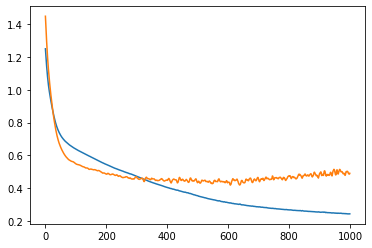

3/3 [==============================] - 0s 5ms/step - loss: 0.5115 - acc: 0.7848
loss= 0.5115161538124084
acc= 0.7848101258277893


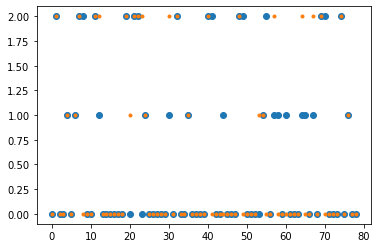

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()

In [7]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import sklearn

def draw_ROC_and_get_AUC(test_y, y_score, n_classes=2):

  test_y = np.eye(n_classes)[test_y]
  y_score = np.eye(n_classes)[y_score]

  # Plot linewidth.
  lw = 2

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
      roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(1)
  plt.plot(fpr["macro"], tpr["macro"],
          label='ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc["macro"]

## ROC 그리기, AUC 출력

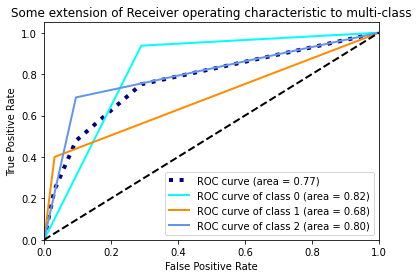

AUC  0.7680315540194573


In [11]:
test_y = test_y.astype(int)
auc = draw_ROC_and_get_AUC(test_y, predicted, n_classes=3)
print("AUC ", auc)

## Confusion Matric

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[45  2  1]
 [ 4  6  5]
 [ 5  0 11]]


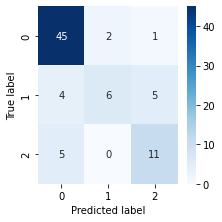

In [15]:
import seaborn as sns

figure = plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.75      0.40      0.52        15
           2       0.65      0.69      0.67        16

    accuracy                           0.78        79
   macro avg       0.74      0.67      0.69        79
weighted avg       0.78      0.78      0.77        79

